<a href="https://colab.research.google.com/github/diego2017003/pds_exercicios_unidade1/blob/main/Exercicios4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exercício 4.1
---
O exercício 4.1 fala a respeito de exibir uma imagem com o histograma equalizado, realizando a equalização antes de exibir a imagem.

Para isso foi construido o script a seguir. Por questões de simplicidade é importante que não se tente rodar o seguinte código no google colaboratory ou no jupyter notebook. Idealmente o script deve ser passado para um módulo equalize.py e executado no terminal com o comando !python equalize.py

In [ ]:
# import a biblioteca de gráficos
import matplotlib.pyplot as plt
# import a biblioteca do opencv
import cv2
# import a biblioteca para manipular matrizes
import numpy as np

#set das informações de plot
#qtd de bins
bins = 32
#largura da linha
lw = 3
#transparência
alpha = 0.5
# inica a captura da câmera
vid = cv2.VideoCapture(0)
# instância 3 subplots, um para cada canal
fig, ax = plt.subplots(3, 1, figsize=(4, 5))
ax1, ax2, ax3 = ax

#inicia os gráficos em três tracks diferentes red, green e blue 
(lineR,) = ax1.plot(
    np.arange(bins),
    np.zeros((bins,)),
    c="r",
    lw=lw,
    alpha=alpha,
)
(lineG,) = ax2.plot(
    np.arange(bins),
    np.zeros((bins,)),
    c="g",
    lw=lw,
    alpha=alpha,
)
(lineB,) = ax3.plot(
    np.arange(bins),
    np.zeros((bins,)),
    c="b",
    lw=lw,
    alpha=alpha,
)
# inicializasse os limites x e y do plot respectivamente
ax1.set_xlim(0, bins - 1)
ax2.set_xlim(0, bins - 1)
ax3.set_xlim(0, bins - 1)
ax1.set_ylim(0, 1)
ax2.set_ylim(0, 1)
ax3.set_ylim(0, 1)
# inicia o plot
plt.ion()
plt.show()

while True:
    #lê as informações da câmera
    ret, frame = vid.read()
    # conta o número máximo de pixels
    numPixels = np.prod(frame.shape[:2])
    # dividi a imagem em três canais
    (b, g, r) = cv2.split(frame)
    # aplica a equealização de histograma nos três canais r, g, b
    r = cv2.equalizeHist(r)
    g = cv2.equalizeHist(g)
    b = cv2.equalizeHist(b)
    # calcula os valores do histograma normalizados entre 0 e 1 pela soma de pixels
    histogramR = cv2.calcHist([r], [0], None, [bins], [0, 256]) / numPixels
    histogramG = cv2.calcHist([g], [0], None, [bins], [0, 256]) / numPixels
    histogramB = cv2.calcHist([b], [0], None, [bins], [0, 256]) / numPixels
    
    # atualiza os valores no plot normalizados entre 0 e 1 pela soma de pixels
    lineR.set_ydata(histogramR)
    lineG.set_ydata(histogramG)
    lineB.set_ydata(histogramB)

    # atualiza a figura exibida pelo matplotlib
    fig.canvas.draw()
    fig.canvas.flush_events()
    bgr = cv2.merge([b, g, r])
    # exibe duas imagens, a imagem inicial e a imagem com a equalização nos três 
    #canais
    cv2.imshow("equalized", bgr)
    cv2.imshow("real", frame)
    
    # pressione e para sair
    if cv2.waitKey(1) & 0xFF == ord("e"):
        break

vid.release()

cv2.destroyAllWindows()


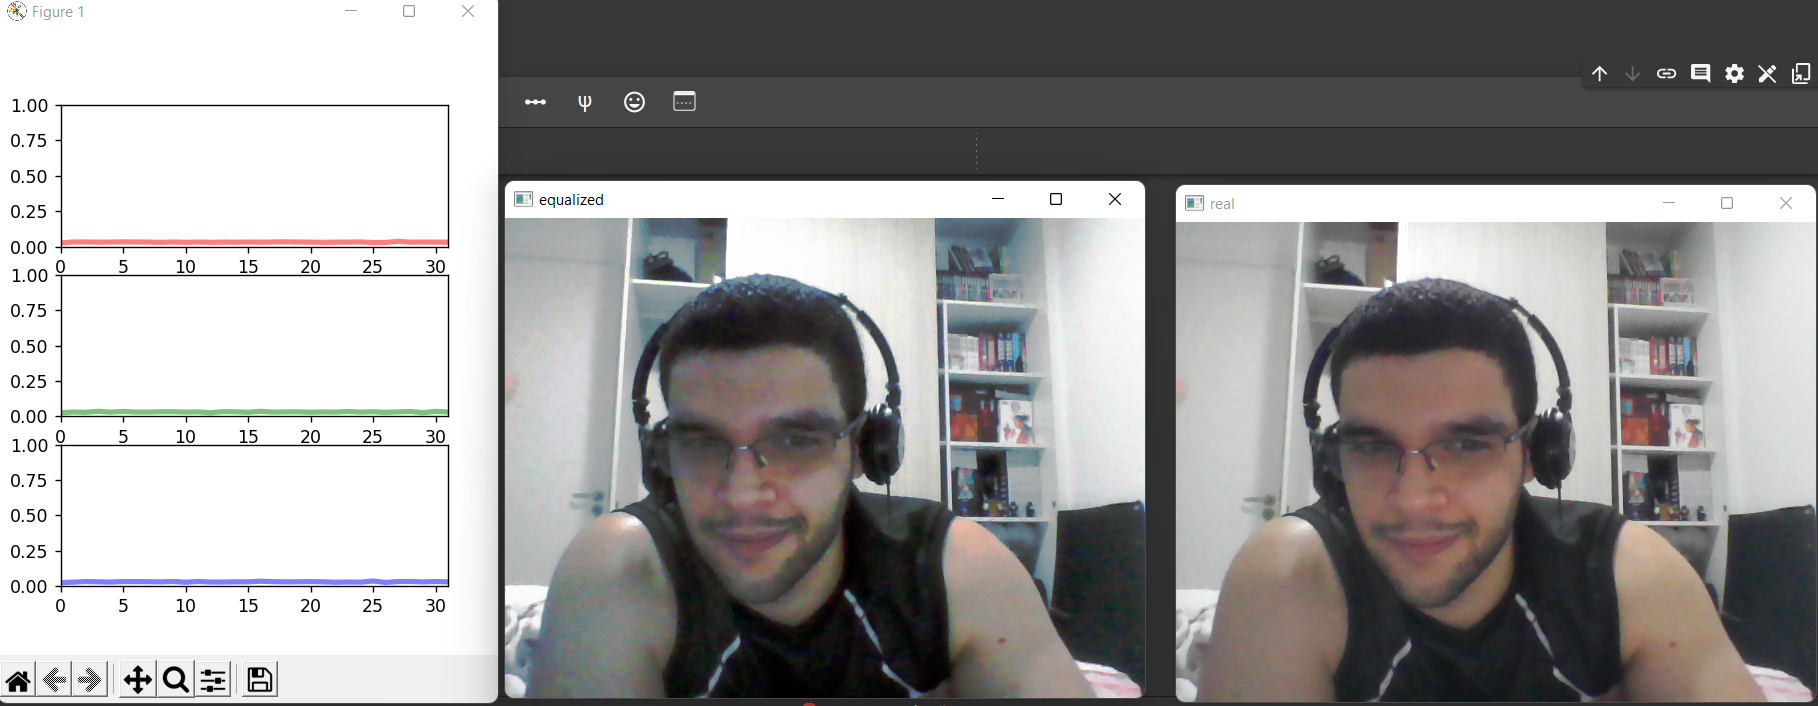

### Exercício 4.2
---
Esse exercício tem como objetivo a detecção de mudanças na cena. O intuito principal da questão é comparar os valores em cena por meio do histograma para determinar se houve ou não mudanças no que está sendo exibido.

Para isso, iremos calcular o histograma de cada canal e verificar a soma das diferenças do histograma. Por escolha arbitrária, se o valor da diferença média nos três canais for superior a 2% iremos fazer um print("Danger Danger!",valor), como diria um velho amigo cientista.
![Alt Text](https://c.tenor.com/VU1VYEqJ1twAAAAC/sheldon-lips-sealed.gif)  

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

#abrimos a captura de vídeo 
vid = cv2.VideoCapture(0)
bins = 32
ret, frame = vid.read()

numPixels = np.prod(frame.shape[:2])
(b, g, r) = cv2.split(frame)

#fazemos uma captura pontual para dar os valores ininiais do histograma  
histogramR = cv2.calcHist([r], [0], None, [bins], [0, 256])
histogramG = cv2.calcHist([r], [0], None, [bins], [0, 256])
histogramB = cv2.calcHist([r], [0], None, [bins], [0, 256])
while True:
#fazemos um loop para capturar o vídeo continuamente
    ret, frame = vid.read()

    numPixels = np.prod(frame.shape[:2])
    (b, g, r) = cv2.split(frame)
# salvamos o valor antigo do histograma
    old_red = histogramR
    old_green = histogramG
    old_blue = histogramB
#atualizamos o histograma
    histogramR = cv2.calcHist([r], [0], None, [bins], [0, 256]) / numPixels
    histogramG = cv2.calcHist([g], [0], None, [bins], [0, 256]) / numPixels
    histogramB = cv2.calcHist([b], [0], None, [bins], [0, 256]) / numPixels
#exibimos a imagem
    cv2.imshow("real", frame)
# criamos um valor com o modulo da diferença entre os histogramas
    dr = abs(histogramR - old_red)
    dg = abs(histogramG - old_green)
    db = abs(histogramB - old_blue)
# calculamos a diferença média dos três canais
    dif = sum([sum(dr), sum(dg), sum(dg)]) / 3
# verificamos se a diferença ultrapassa 2% se sim, disparamos o "Danger Danger!"
    if dif > 0.02:
        print("Danger Danger!", dif)
# pressione e para sair
    if cv2.waitKey(1) & 0xFF == ord("e"):
        break

vid.release()

cv2.destroyAllWindows()


Assim como a questão 1 o aconselhável é também copiar esse código para um script e executa-lo em um terminal que possua permissão para acessar a câmera do computador.